<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-from-EDA" data-toc-modified-id="Import-Data-from-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data from EDA</a></span><ul class="toc-item"><li><span><a href="#Load--Data" data-toc-modified-id="Load--Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load  Data</a></span></li><li><span><a href="#Columns" data-toc-modified-id="Columns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Columns</a></span></li></ul></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Basic-Table" data-toc-modified-id="Basic-Table-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Basic Table</a></span></li><li><span><a href="#Balanced-Label" data-toc-modified-id="Balanced-Label-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Balanced Label</a></span></li><li><span><a href="#KNN-imputation" data-toc-modified-id="KNN-imputation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>KNN-imputation</a></span></li><li><span><a href="#Add-Features" data-toc-modified-id="Add-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Add Features</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Hyperparameter-Search" data-toc-modified-id="Hyperparameter-Search-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hyperparameter Search</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Further-Analysis" data-toc-modified-id="Further-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further Analysis</a></span><ul class="toc-item"><li><span><a href="#Learning-Curve" data-toc-modified-id="Learning-Curve-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Learning Curve</a></span></li></ul></li></ul></div>

This notebook is prepared for Bootcamp 1 participants.

Please install library (in developer mode) to get started.

https://github.com/jykim/e3tools

# Import Data from EDA

In [1]:
import os
import re
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
style.use('fivethirtyeight')

In [2]:
import logging
logging.disable(logging.ERROR)

In [3]:
import e3tools.eda_table as et
import e3tools.ml_bench as mb
import e3tools.eda_display_utils as edu
from importlib import reload

In [4]:
# et.load_bokeh()

## Load  Data

Download data from:
    https://www.kaggle.com/kaggle/kaggle-survey-2017

In [5]:
DATA_PATH = "./kaggle-dsml-survey-2017-post-eda.csv"

In [6]:
mcr = pd.read_csv(DATA_PATH, encoding='latin-1')

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,231,232,233,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,259) have 

In [7]:
et.add_category_dtype(mcr, "FormalEducation", 
                      ["Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'])
# et.add_category_dtype(mcr, "ParentsEducation", 
#                       ["Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'])
et.add_category_dtype(mcr, "Tenure", 
                      ["I don't write code to analyze data", 'Less than a year', '1 to 2 years', '3 to 5 years', '6 to 10 years', 'More than 10 years'])
et.add_category_dtype(mcr, "EmployerMLTime", 
                      ['Less than one year', '1-2 years', '3-5 years', '6-10 years', 'More than 10 years'])
et.add_category_dtype(mcr, "EmployerSize", 
                      ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', 
                       '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', 
                       '5,000 to 9,999 employees', '10,000 or more employees'])

In [8]:
len(mcr)

22298

In [9]:
del mcr['ParentsEducation_cat']

## Columns

In [10]:
mcr["NoCompensation"] = mcr.CompensationAmount.isnull()
mcr.NoCompensation.value_counts()

True     17113
False     5185
Name: NoCompensation, dtype: int64

In [11]:
mcr_f = mcr[~mcr.NoCompensation]

In [12]:
mcr_f.CompensationUSD_100k.value_counts()

False    3499
True     1686
Name: CompensationUSD_100k, dtype: int64

In [13]:
pd.crosstab(mcr_f.CompensationUSD_100k, mcr_f.GenderSelect)

GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming"
CompensationUSD_100k,,,,
False,19,527,2932,18
True,13,190,1469,11


# Prepare Data

## Basic Table

In [14]:
target_cols1 = \
    [e for e in mcr.columns if re.search(r"_(int|cat)$", e)] + \
    ["CompensationUSD_100k"]
target_cols1

['JobSatisfaction_int',
 'JobHuntTime_int',
 'PastJobTitlesSelect_cat',
 'CurrentEmployerType_cat',
 'FormalEducation_cat',
 'Tenure_cat',
 'EmployerMLTime_cat',
 'EmployerSize_cat',
 'CompensationUSD_100k']

In [15]:
reload(mb)
mt = mb.MLTable(mcr_f[target_cols1], "CompensationUSD_100k")

In [16]:
mt.colinfo()

,DataType,ValueCount,NullCount,3,8,9
JobSatisfaction_int,float64,10,91,10,7,7
JobHuntTime_int,float64,0,5185,NaN,NaN,NaN
PastJobTitlesSelect_cat,object,4,696,Scientist,Analyst,Engineer
CurrentEmployerType_cat,object,7,61,Self-employed,non-profit,company that doesn't perform advanced analytics
FormalEducation_cat,category,4,202,Master's degree,Bachelor's degree,Bachelor's degree
Tenure_cat,category,6,10,More than 10 years,3 to 5 years,1 to 2 years
EmployerMLTime_cat,category,5,968,NaN,NaN,1-2 years
EmployerSize_cat,category,8,610,NaN,20 to 99 employees,20 to 99 employees
CompensationUSD_100k,object,2,0,True,False,False


In [17]:
mt.tbl.CompensationUSD_100k.value_counts()

False    3499
True     1686
Name: CompensationUSD_100k, dtype: int64

In [18]:
mt.normalize(topk=5)

,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat,CurrentEmployerType_cat,FormalEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k
3,10.0,0.0,Scientist,NaN,Master's degree,More than 10 years,NaN,NaN,True
8,7.0,0.0,Analyst,NaN,Bachelor's degree,3 to 5 years,NaN,20 to 99 employees,False
9,7.0,0.0,Engineer,company that doesn't perform advanced analytics,Bachelor's degree,1 to 2 years,1-2 years,20 to 99 employees,False
11,7.0,0.0,Engineer,professional services/consulting firm,Bachelor's degree,3 to 5 years,3-5 years,100 to 499 employees,False
14,5.0,0.0,Engineer,professional services/consulting firm,Master's degree,1 to 2 years,1-2 years,NaN,False
...,...,...,...,...,...,...,...,...,...
22107,7.0,0.0,Scientist,company that performs advanced analytics,Doctoral degree,More than 10 years,More than 10 years,"10,000 or more employees",True
22114,10.0,0.0,Researcher,academia,Doctoral degree,More than 10 years,6-10 years,100 to 499 employees,False
22159,8.0,0.0,Analyst,company that performs advanced analytics,Master's degree,3 to 5 years,1-2 years,"10,000 or more employees",False
22255,6.0,0.0,NaN,company that doesn't perform advanced analytics,Master's degree,3 to 5 years,1-2 years,20 to 99 employees,False


In [19]:
mt_e = mt.encode(impute="mean")
mt_e.head()

Using normalized table...


,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat_Analyst,PastJobTitlesSelect_cat_Engineer,PastJobTitlesSelect_cat_Researcher,PastJobTitlesSelect_cat_Scientist,CurrentEmployerType_cat_academia,CurrentEmployerType_cat_company that doesn't perform advanced analytics,CurrentEmployerType_cat_company that makes advanced analytic software,CurrentEmployerType_cat_company that performs advanced analytics,CurrentEmployerType_cat_professional services/consulting firm,FormalEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k
0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.838511,4.391761,1.0
1,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.838511,2.000000,0.0
2,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.000000,2.000000,0.0
3,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.000000,3.000000,0.0
4,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.000000,4.391761,0.0


In [20]:
mt.split()

Using encoded table...
Train Shape: (4148, 16)
Test Shape: (1037, 16)


## Balanced Label

In [21]:
from copy import deepcopy
mt_b = deepcopy(mt)# mb.MLTable()
mt_b.name = "Balanced"
mt_b.balance_train()

Train Shape: (2702, 16)


,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat_Analyst,PastJobTitlesSelect_cat_Engineer,PastJobTitlesSelect_cat_Researcher,PastJobTitlesSelect_cat_Scientist,CurrentEmployerType_cat_academia,CurrentEmployerType_cat_company that doesn't perform advanced analytics,CurrentEmployerType_cat_company that makes advanced analytic software,CurrentEmployerType_cat_company that performs advanced analytics,CurrentEmployerType_cat_professional services/consulting firm,FormalEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k
0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,3.000000,2.000000,0.0
1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.000000,2.000000,0.0
2,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.000000,3.000000,0.0
3,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.000000,7.000000,0.0
4,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.000000,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,2.000000,5.000000,1.0
2698,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,1.838511,4.391761,1.0
2699,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.000000,5.000000,1.0
2700,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.000000,2.000000,1.0


## KNN-imputation

In [22]:
mt_i = deepcopy(mt)# mb.MLTable()
mt_i.name = "Imputed(KNN)"
mt_i.encode(impute='knn')
mt_i.split()
mt_i.tbl_e.head().transpose()

Using normalized table...
Using encoded table...
Train Shape: (4148, 16)
Test Shape: (1037, 16)


,0,1,2,3,4
JobSatisfaction_int,10.000000,7.000000,7.0,7.0,5.000000
JobHuntTime_int,0.000000,0.000000,0.0,0.0,0.000000
PastJobTitlesSelect_cat_Analyst,0.000000,1.000000,0.0,0.0,0.000000
PastJobTitlesSelect_cat_Engineer,0.000000,0.000000,1.0,1.0,1.000000
PastJobTitlesSelect_cat_Researcher,0.000000,0.000000,0.0,0.0,0.000000
PastJobTitlesSelect_cat_Scientist,1.000000,0.000000,0.0,0.0,0.000000
CurrentEmployerType_cat_academia,0.000000,0.000000,0.0,0.0,0.000000
CurrentEmployerType_cat_company that doesn't perform advanced analytics,0.000000,0.000000,1.0,0.0,0.000000
CurrentEmployerType_cat_company that makes advanced analytic software,0.000000,0.000000,0.0,0.0,0.000000
CurrentEmployerType_cat_company that performs advanced analytics,0.000000,0.000000,0.0,0.0,0.000000


## Add Features

In [23]:
aux_features = [
    "Country",
    "CodeWriter",
    "DataScienceIdentitySelect",
    "FirstTrainingSelect",
    "MLToolNextYearSelect",
    "MajorSelect",
    "ProveKnowledgeSelect"
]
target_cols2 = \
    target_cols1 + \
    aux_features
target_cols2

['JobSatisfaction_int',
 'JobHuntTime_int',
 'PastJobTitlesSelect_cat',
 'CurrentEmployerType_cat',
 'FormalEducation_cat',
 'Tenure_cat',
 'EmployerMLTime_cat',
 'EmployerSize_cat',
 'CompensationUSD_100k',
 'Country',
 'CodeWriter',
 'DataScienceIdentitySelect',
 'FirstTrainingSelect',
 'MLToolNextYearSelect',
 'MajorSelect',
 'ProveKnowledgeSelect']

In [24]:
reload(mb)
mt2 = mb.MLTable(mcr_f[target_cols2], "CompensationUSD_100k", name='MoreFeatures')

In [25]:
mt2.normalize(topk=5);

In [26]:
mt2_e = mt2.encode(impute="mean")
mt2_e.head();

Using normalized table...


In [27]:
mt2.split()

Using encoded table...
Train Shape: (4148, 40)
Test Shape: (1037, 40)


In [28]:
target_cols3 = \
    target_cols2 + \
    [e for e in mcr.columns if re.search(r"^(LearningPlatformSelect|Time)", e)]
target_cols3

['JobSatisfaction_int',
 'JobHuntTime_int',
 'PastJobTitlesSelect_cat',
 'CurrentEmployerType_cat',
 'FormalEducation_cat',
 'Tenure_cat',
 'EmployerMLTime_cat',
 'EmployerSize_cat',
 'CompensationUSD_100k',
 'Country',
 'CodeWriter',
 'DataScienceIdentitySelect',
 'FirstTrainingSelect',
 'MLToolNextYearSelect',
 'MajorSelect',
 'ProveKnowledgeSelect',
 'LearningPlatformSelect',
 'TimeSpentStudying',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'LearningPlatformSelect_Podcasts',
 'LearningPlatformSelect_Tutoring_mentoring',
 'LearningPlatformSelect_Stack_Overflow_Q_A',
 'LearningPlatformSelect_Friends_network',
 'LearningPlatformSelect_Non_Kaggle_online_communities',
 'LearningPlatformSelect_Company_internal_community',
 'LearningPlatformSelect_Conferences',
 'LearningPlatformSelect_YouTube_Videos',
 'LearningPlatformSelect_Online_courses',
 'LearningPlatformSelect_Personal_Projects',
 'LearningPlatformS

In [29]:
reload(mb)
mt3 = mb.MLTable(mcr_f[target_cols3], "CompensationUSD_100k", name='MoreFeatures(2)')

In [30]:
mt3.normalize(topk=5)

,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat,CurrentEmployerType_cat,FormalEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k,Country,CodeWriter,DataScienceIdentitySelect,FirstTrainingSelect,MLToolNextYearSelect,MajorSelect,ProveKnowledgeSelect,LearningPlatformSelect,TimeSpentStudying,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,LearningPlatformSelect_Podcasts,LearningPlatformSelect_Tutoring_mentoring,LearningPlatformSelect_Stack_Overflow_Q_A,LearningPlatformSelect_Friends_network,LearningPlatformSelect_Non_Kaggle_online_communities,LearningPlatformSelect_Company_internal_community,LearningPlatformSelect_Conferences,LearningPlatformSelect_YouTube_Videos,LearningPlatformSelect_Online_courses,LearningPlatformSelect_Personal_Projects,LearningPlatformSelect_Textbook,LearningPlatformSelect_College_University,LearningPlatformSelect_Arxiv,LearningPlatformSelect_Other,LearningPlatformSelect_Official_documentation,LearningPlatformSelect_Blogs,LearningPlatformSelect_Kaggle,LearningPlatformSelect_Trade_book,LearningPlatformSelect_Newsletters
3,10.0,0.0,Scientist,NaN,Master's degree,More than 10 years,NaN,NaN,True,United States,Yes,Yes,University courses,TensorFlow,Mathematics or statistics,NaN,NaN,NaN,50.0,20.0,0.0,10.0,20.0,0.0,False,False,False,True,False,False,True,False,True,True,False,True,False,False,True,True,False,False,False
8,7.0,0.0,Analyst,NaN,Bachelor's degree,3 to 5 years,NaN,20 to 99 employees,False,NaN,Yes,No,Work,NaN,NaN,NaN,NaN,NaN,60.0,10.0,5.0,15.0,10.0,0.0,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,True,True,False,True
9,7.0,0.0,Engineer,company that doesn't perform advanced analytics,Bachelor's degree,1 to 2 years,1-2 years,20 to 99 employees,False,Russia,Yes,Sort of (Explain more),Self-taught,NaN,NaN,NaN,NaN,NaN,40.0,30.0,15.0,10.0,5.0,0.0,True,False,True,False,True,False,True,True,True,True,True,False,True,False,True,True,True,False,False
11,7.0,0.0,Engineer,professional services/consulting firm,Bachelor's degree,3 to 5 years,3-5 years,100 to 499 employees,False,India,Yes,NaN,University courses,Other,Electrical Engineering,NaN,NaN,NaN,30.0,20.0,10.0,10.0,30.0,0.0,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False
14,5.0,0.0,Engineer,professional services/consulting firm,Master's degree,1 to 2 years,1-2 years,NaN,False,NaN,Yes,No,"Online courses (coursera, udemy, edx, etc.)",TensorFlow,Computer Science,NaN,NaN,NaN,35.0,20.0,25.0,10.0,10.0,0.0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22107,7.0,0.0,Scientist,company that performs advanced analytics,Doctoral degree,More than 10 years,More than 10 years,"10,000 or more employees",True,United States,Yes,NaN,University courses,NaN,Computer Science,NaN,NaN,NaN,30.0,30.0,15.0,10.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22114,10.0,0.0,Researcher,academia,Doctoral degree,More than 10 years,6-10 years,100 to 499 employees,False,NaN,Yes,NaN,University courses,NaN,Electrical Engineering,NaN,NaN,NaN,10.0,50.0,10.0,20.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22159,8.0,0.0,Analyst,company that performs advanced analytics,Master's degree,3 to 5 years,1-2 years,"10,000 or more employees",False,NaN,Yes,No,"Online courses (coursera, udemy, edx, etc.)",TensorFlow,Mathematics or statistics,NaN,NaN,NaN,60.0,10.0,5.0,10.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22255,6.0,0.0,NaN,company that doesn't perform advanced analytics,Master's degree,3 to 5 years,1-2 years,20 to 99 employees,False,NaN,Yes,Sort of (Explain 

In [31]:
mt3_e = mt3.encode(impute="mean")

Using normalized table...


In [32]:
mt3_e.head()

,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat_Analyst,PastJobTitlesSelect_cat_Engineer,PastJobTitlesSelect_cat_Researcher,PastJobTitlesSelect_cat_Scientist,CurrentEmployerType_cat_academia,CurrentEmployerType_cat_company that doesn't perform advanced analytics,CurrentEmployerType_cat_company that makes advanced analytic software,CurrentEmployerType_cat_company that performs advanced analytics,CurrentEmployerType_cat_professional services/consulting firm,FormalEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k,Country_India,Country_Other,Country_Russia,Country_United Kingdom,Country_United States,CodeWriter_Yes,DataScienceIdentitySelect_No,DataScienceIdentitySelect_Sort of (Explain more),DataScienceIdentitySelect_Yes,FirstTrainingSelect_Kaggle competitions,"FirstTrainingSelect_Online courses (coursera, udemy, edx, etc.)",FirstTrainingSelect_Self-taught,FirstTrainingSelect_University courses,FirstTrainingSelect_Work,MLToolNextYearSelect_Other,MLToolNextYearSelect_Python,MLToolNextYearSelect_R,MLToolNextYearSelect_Spark / MLlib,MLToolNextYearSelect_TensorFlow,MajorSelect_Computer Science,MajorSelect_Electrical Engineering,MajorSelect_Engineering (non-computer focused),MajorSelect_Mathematics or statistics,MajorSelect_Physics,LearningPlatformSelect_College/University,LearningPlatformSelect_Kaggle,LearningPlatformSelect_Online courses,LearningPlatformSelect_Personal Projects,LearningPlatformSelect_Stack Overflow Q&A,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,LearningPlatformSelect_Podcasts_False,LearningPlatformSelect_Podcasts_True,LearningPlatformSelect_Tutoring_mentoring_False,LearningPlatformSelect_Tutoring_mentoring_True,LearningPlatformSelect_Stack_Overflow_Q_A_False,LearningPlatformSelect_Stack_Overflow_Q_A_True,LearningPlatformSelect_Friends_network_False,LearningPlatformSelect_Friends_network_True,LearningPlatformSelect_Non_Kaggle_online_communities_False,LearningPlatformSelect_Non_Kaggle_online_communities_True,LearningPlatformSelect_Company_internal_community_False,LearningPlatformSelect_Company_internal_community_True,LearningPlatformSelect_Conferences_False,LearningPlatformSelect_Conferences_True,LearningPlatformSelect_YouTube_Videos_False,LearningPlatformSelect_YouTube_Videos_True,LearningPlatformSelect_Online_courses_False,LearningPlatformSelect_Online_courses_True,LearningPlatformSelect_Personal_Projects_False,LearningPlatformSelect_Personal_Projects_True,LearningPlatformSelect_Textbook_False,LearningPlatformSelect_Textbook_True,LearningPlatformSelect_College_University_False,LearningPlatformSelect_College_University_True,LearningPlatformSelect_Arxiv_False,LearningPlatformSelect_Arxiv_True,LearningPlatformSelect_Other_False,LearningPlatformSelect_Other_True,LearningPlatformSelect_Official_documentation_False,LearningPlatformSelect_Official_documentation_True,LearningPlatformSelect_Blogs_False,LearningPlatformSelect_Blogs_True,LearningPlatformSelect_Kaggle_False,LearningPlatformSelect_Kaggle_True,LearningPlatformSelect_Trade_book_False,LearningPlatformSelect_Trade_book_True,LearningPlatformSelect_Newsletters_False,LearningPlatformSelect_Newsletters_True
0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.838511,4.391761,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,20.0,0.0,10.0,20.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.838511,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,10.0,5.0,15.0,10.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,7.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [33]:
mt3.split()

Using encoded table...
Train Shape: (4148, 89)
Test Shape: (1037, 89)


## Summary

In [34]:
len(mt.train), len(mt2.train), len(mt_b.train), len(mt_i.train)

(4148, 4148, 2702, 4148)

# Hyperparameter Search

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

mlb = mb.MLBench()
mlb.add_table(mt)
for max_depth in range(2, 10, 1):
    mlb.add_model(mb.MLModel("DT-md%d" % max_depth, DecisionTreeClassifier(max_depth=max_depth)))
for c in [0.5, 1, 2]:
    mlb.add_model(mb.MLModel("LR-c%f" % c, LogisticRegression(C=c, max_iter=200)))

mlb.cross_validate_batch()

,tbl_name,raw_features,encoded_features,train_set,test_set,model_name,cv_roc_auc
0,Default,9,16,4148,1037,DT-md2,0.647422
1,Default,9,16,4148,1037,DT-md3,0.666000
2,Default,9,16,4148,1037,DT-md4,0.674876
3,Default,9,16,4148,1037,DT-md5,0.668904
4,Default,9,16,4148,1037,DT-md6,0.663342
5,Default,9,16,4148,1037,DT-md7,0.657909
6,Default,9,16,4148,1037,DT-md8,0.642876
7,Default,9,16,4148,1037,DT-md9,0.629976
8,Default,9,16,4148,1037,LR-c0.500000,0.691934
9,Default,9,16,4148,1037,LR-c1.000000,0.691856


In [36]:
mlb.cross_validate_batch(scoring='accuracy')

,tbl_name,raw_features,encoded_features,train_set,test_set,model_name,cv_accuracy
0,Default,9,16,4148,1037,DT-md2,0.683704
1,Default,9,16,4148,1037,DT-md3,0.697200
2,Default,9,16,4148,1037,DT-md4,0.702748
3,Default,9,16,4148,1037,DT-md5,0.701061
4,Default,9,16,4148,1037,DT-md6,0.697684
5,Default,9,16,4148,1037,DT-md7,0.696241
6,Default,9,16,4148,1037,DT-md8,0.675028
7,Default,9,16,4148,1037,DT-md9,0.673581
8,Default,9,16,4148,1037,LR-c0.500000,0.706846
9,Default,9,16,4148,1037,LR-c1.000000,0.707569


<b>Finding:</b>
>    Decision tree is sensitive to max_depth param

# Evaluation

In [37]:
mlb = mb.MLBench()

mlb.add_table(mt)
mlb.add_table(mt_b)
mlb.add_table(mt_i)
mlb.add_table(mt2)
mlb.add_table(mt3)
mlb.add_model(mb.MLModel("DT", DecisionTreeClassifier(max_depth=4)))
# mlb.add_model(mb.MLModel("RF", RandomForestClassifier()))
mlb.add_model(mb.MLModel("GBDT", GradientBoostingClassifier()))
# mlb.add_model(mb.MLModel("MLP", MLPClassifier(max_iter=500)))
mlb.add_model(mb.MLModel("LR", LogisticRegression(solver='liblinear')))

In [38]:
mlb.train_batch()
df_e = mlb.evaluate_batch()
df_e

,tbl_name,raw_features,encoded_features,train_set,test_set,model_name,accuracy,roc_auc,type1_error,type2_error
0,Default,9,16,4148,1037,DT,0.709740,0.672726,0.142450,0.600000
1,Default,9,16,4148,1037,GBDT,0.696239,0.682272,0.119658,0.689552
2,Default,9,16,4148,1037,LR,0.708775,0.692482,0.088319,0.716418
3,Balanced,9,16,2702,1037,DT,0.662488,0.655260,0.267806,0.483582
4,Balanced,9,16,2702,1037,GBDT,0.638380,0.667987,0.333333,0.420896
5,Balanced,9,16,2702,1037,LR,0.637416,0.688217,0.377493,0.331343
6,Imputed(KNN),9,16,4148,1037,DT,0.707811,0.698059,0.134615,0.587258
7,Imputed(KNN),9,16,4148,1037,GBDT,0.720347,0.703997,0.079882,0.653740
8,Imputed(KNN),9,16,4148,1037,LR,0.710704,0.700595,0.071006,0.698061
9,MoreFeatures,16,40,4148,1037,DT,0.732883,0.716948,0.083333,0.623229


In [39]:
for m in ['roc_auc', 'accuracy']:
    edu.print_title(m)
    display(pd.pivot_table(df_e, index='tbl_name', columns='model_name', values=m).\
        round(3).style.background_gradient(cmap='cool'))

model_name,DT,GBDT,LR
tbl_name,,,
Balanced,0.655,0.668,0.688
Default,0.673,0.682,0.692
Imputed(KNN),0.698,0.704,0.701
MoreFeatures,0.717,0.748,0.741
MoreFeatures(2),0.723,0.75,0.736


model_name,DT,GBDT,LR
tbl_name,,,
Balanced,0.662,0.638,0.637
Default,0.71,0.696,0.709
Imputed(KNN),0.708,0.72,0.711
MoreFeatures,0.733,0.739,0.73
MoreFeatures(2),0.746,0.744,0.729


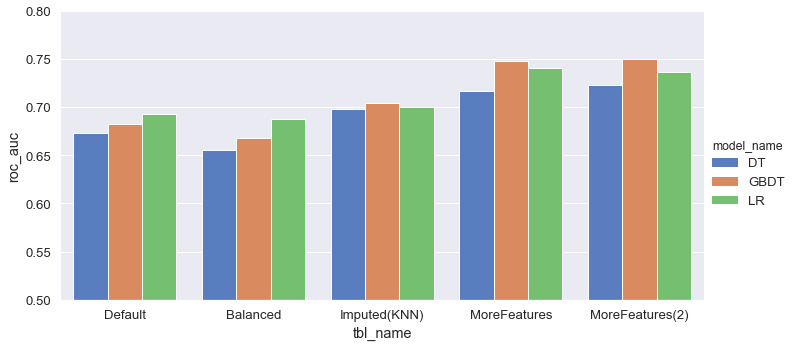

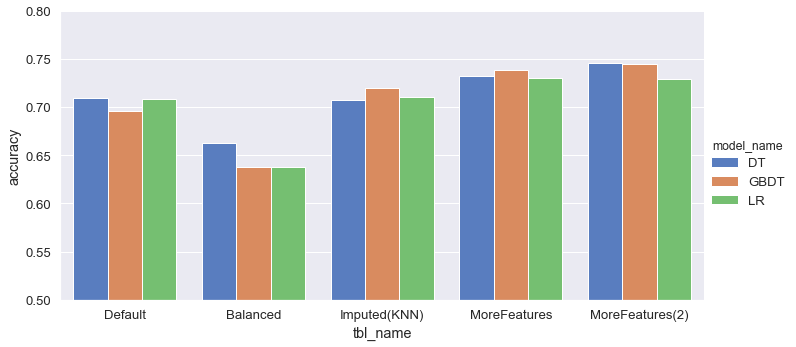

In [40]:
for metric in ["roc_auc", "accuracy"]:
    g = sns.catplot(x="tbl_name", y=metric, hue="model_name", data=df_e,
                    height=5, aspect=2, kind="bar", palette="muted")
    g.set(ylim=(0.5, 0.8))

<b>Finding:</b>
>    High-capacity model (GBDT) benefit more from additional features

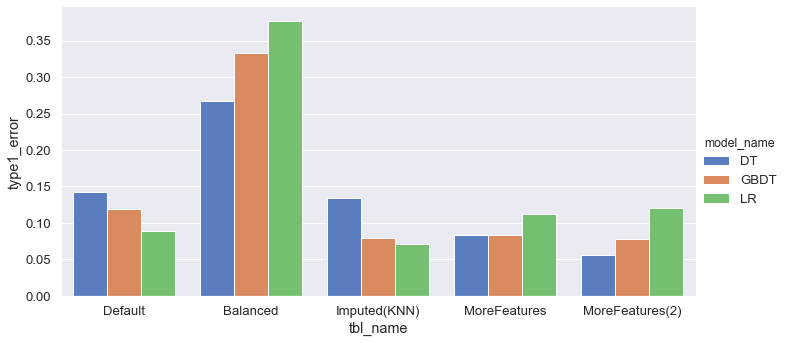

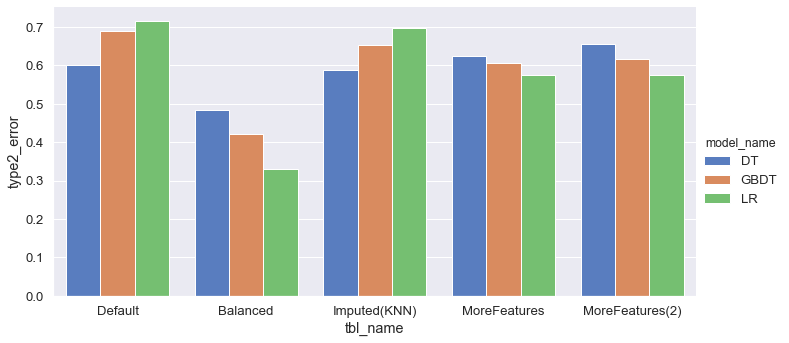

In [41]:
for metric in ["type1_error", "type2_error"]:
    g = sns.catplot(x="tbl_name", y=metric, hue="model_name", data=df_e,
                    height=5, aspect=2, kind="bar", palette="muted")

<b>Finding:</b>
>    Balancing label reduce the gap btw. type 1 and type 2 error

# Further Analysis

## Learning Curve 

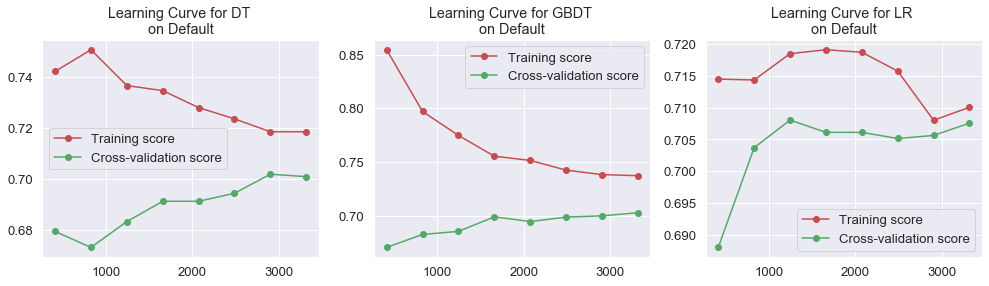

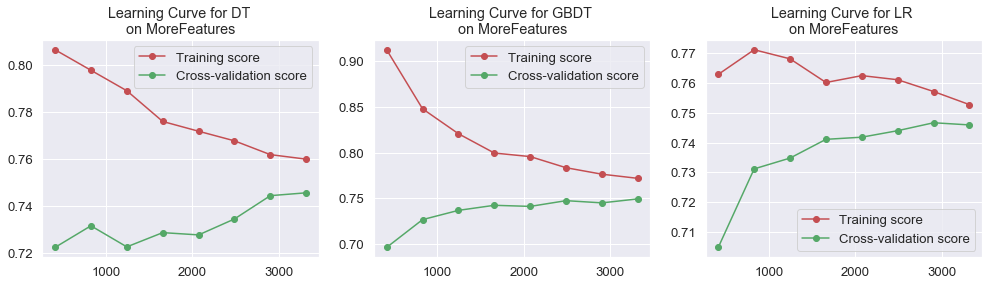

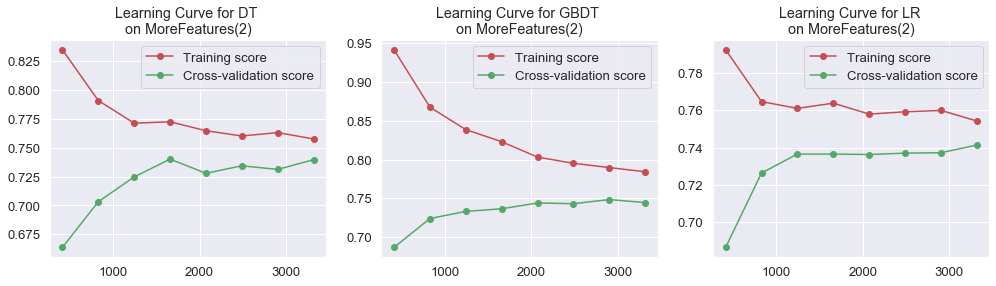

In [42]:
reload(mb)
mlb = mb.MLBench()

mlb.add_table(mt)
mlb.add_table(mt2)
mlb.add_table(mt3)
mlb.add_model(mb.MLModel("DT", DecisionTreeClassifier(max_depth=5)))
mlb.add_model(mb.MLModel("GBDT", GradientBoostingClassifier()))
mlb.add_model(mb.MLModel("LR", LogisticRegression(solver='liblinear')))

mlb.plot_learning_curve(random_state=2)

<b>Finding:</b>
>    More training data increase overfitting (higher gap btw. training vs. CV score)<p>
>    High-capacity model still shows at the end, which means they can benefit from additional data.

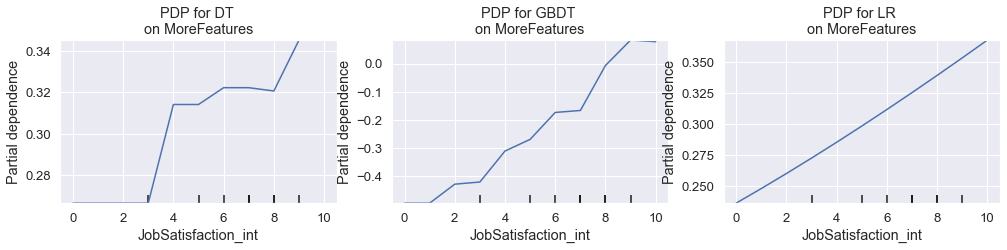

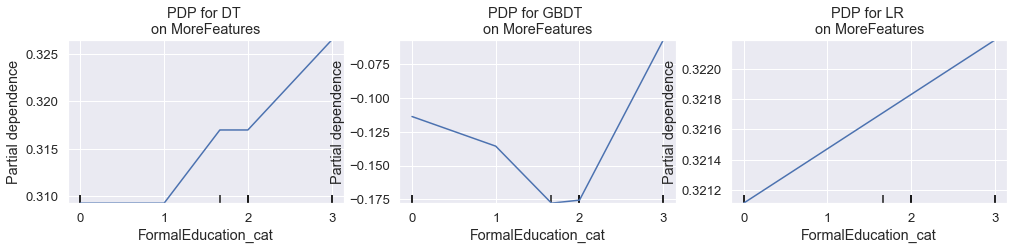

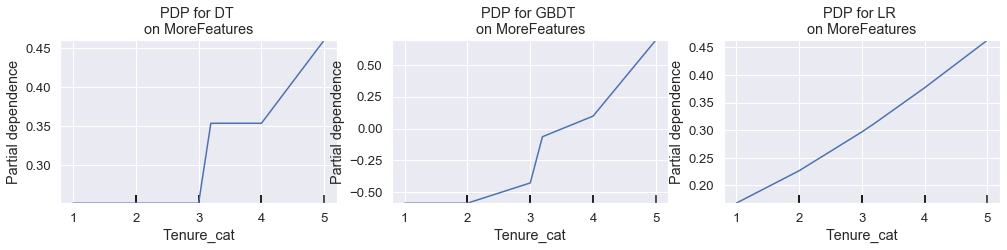

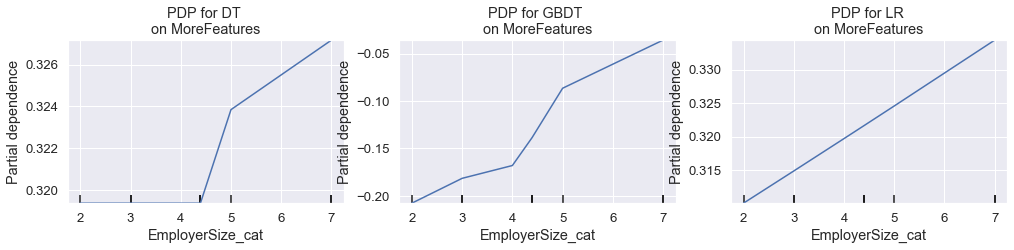

In [47]:
mlb = mb.MLBench()
# mlb.add_table(mt)
mlb.add_table(mt2)
mlb.add_model(mb.MLModel("DT", DecisionTreeClassifier(max_depth=5)))
mlb.add_model(mb.MLModel("GBDT", GradientBoostingClassifier()))
mlb.add_model(mb.MLModel("LR", LogisticRegression(solver='liblinear')))
mlb.train_batch()

mlb.plot_partial_dependence(feature_set=['JobSatisfaction_int', 'FormalEducation_cat', 'Tenure_cat', 'EmployerSize_cat'])

<b>Finding:</b>
>    PDP shows some non-linearities in feature-label relationship